In [7]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import *
%matplotlib inline

4096it [01:05, 62.67it/s] 


[[9.56017657e-01 1.10066789e+00 9.96980314e-01 ... 9.70254921e-01
  1.18017853e+00 9.25605921e-01]
 [1.08131155e+00 7.99252377e-01 1.24490878e+00 ... 1.29743157e+00
  1.17807215e+00 9.08789345e-01]
 [9.78171633e-01 1.02996952e+00 1.03632871e+00 ... 1.66811450e+00
  9.25852785e-01 8.92285552e-01]
 ...
 [1.52117876e+00 9.26175340e-01 1.04327592e+00 ... 1.07213246e+00
  4.73971661e+00 8.03857010e-01]
 [8.85794099e-01 1.11987655e+00 9.16151646e-01 ... 9.38501600e-01
  1.17255058e+00 1.03635388e+00]
 [7.91431495e-01 1.66713029e+00 7.10397446e-01 ... 1.27348510e+03
  4.75716745e-01 3.41733755e-01]]


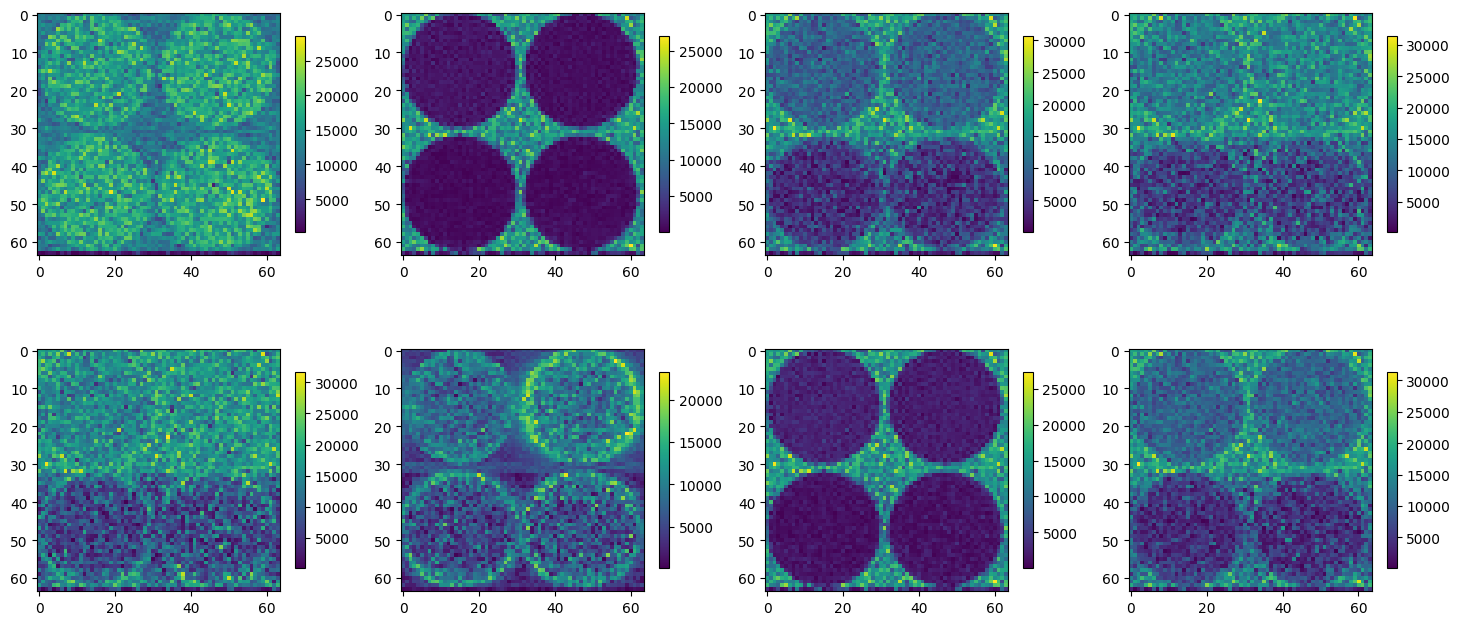

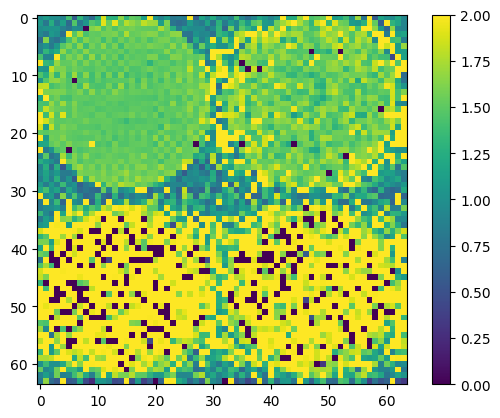

In [8]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA10_FOV320_K64_center_first", i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,2)

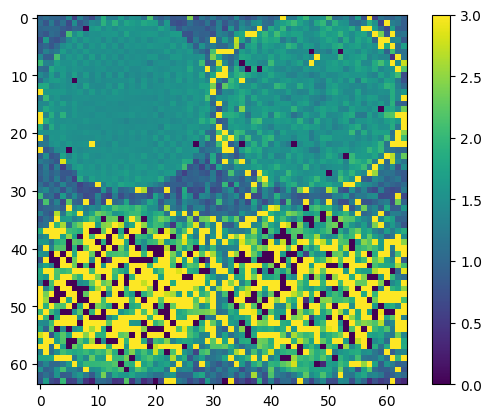

In [10]:
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,3)